## Imports: 

In [1]:
import pickle
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## loading database:

In [2]:
with open('pre_processed_census_database.pkl', mode='rb') as f:
    X_training, y_training, X_test, y_test, X_scaler = pickle.load(f)

In [3]:
X_training.shape, y_training.shape, X_test.shape, y_test.shape

((25637, 108), (25637,), (4525, 108), (4525,))

In [4]:
X_training

array([[-0.24923292,  5.7990656 , -0.2618232 , ..., -0.14945152,
        -0.21178197,  1.56608846],
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.02660563],
       [-0.24923292, -0.17244157,  3.81937127, ..., -0.14945152,
        -0.21178197, -0.42477915],
       ...,
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.02660563],
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.02660563],
       [-0.24923292, -0.17244157, -0.2618232 , ..., -0.14945152,
        -0.21178197, -0.82295267]])

In [5]:
y_training

array([0., 0., 0., ..., 0., 0., 0.])

## Training

### Model

In [6]:
model = keras.Sequential([
    keras.layers.Dense(108, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(32, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation=tensorflow.nn.sigmoid),
])


### Hyperparameters

In [7]:
adam = keras.optimizers.Adam(learning_rate=0.0001)

callbacks = [
    keras.callbacks.EarlyStopping('val_loss'), 
    keras.callbacks.EarlyStopping('val_accuracy')
]

### Compile

In [8]:
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_training, y_training, 
                    batch_size=64,
                    epochs=30, 
                    validation_split=0.2, 
                    callbacks=callbacks)

Epoch 1/30
321/321 [==============================] - 2s 3ms/step - loss: 0.5884 - accuracy: 0.6854 - val_loss: 0.4534 - val_accuracy: 0.7543
Epoch 2/30
321/321 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7897 - val_loss: 0.3792 - val_accuracy: 0.8247
Epoch 3/30
321/321 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8206 - val_loss: 0.3587 - val_accuracy: 0.8303
Epoch 4/30
321/321 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8252 - val_loss: 0.3503 - val_accuracy: 0.8319
Epoch 5/30
321/321 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8325 - val_loss: 0.3444 - val_accuracy: 0.8358
Epoch 6/30
321/321 [==============================] - 1s 2ms/step - loss: 0.3594 - accuracy: 0.8360 - val_loss: 0.3411 - val_accuracy: 0.8381
Epoch 7/30
321/321 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8413 - val_loss: 0.3378 - val_accuracy: 0.8411
Epoch 

## Visualizing training and validation:

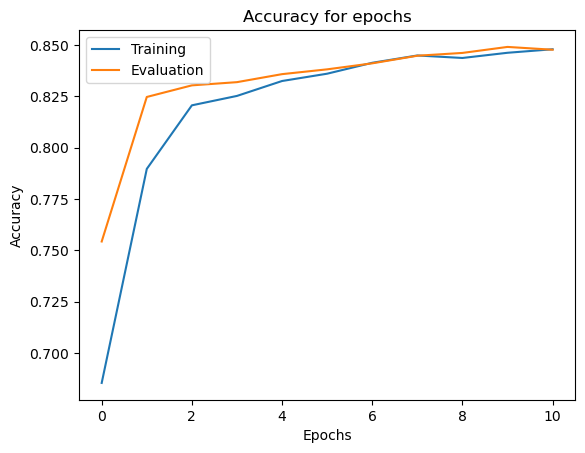

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Visualizing losses and validation:

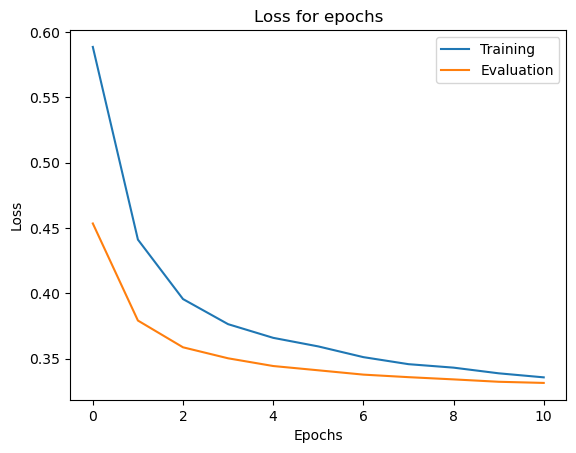

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Evaluating the model with the test base:
### Accuracy and Loss

In [11]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'\nLOSS: >>>>> {loss_test}')
print(f'\nACCURACY: >>>>> {accuracy_test}')

142/142 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8579

LOSS: >>>>> 0.32367143034935

ACCURACY: >>>>> 0.8579005599021912


## Testing with test dataset 

In [12]:
test_data = model.predict(X_test)
prediction = np.argmax(test_data[0])
pred_true = y_test[0]

142/142 [==============================] - 0s 966us/step


In [13]:
if prediction == 0:
    print('Pediction: >>> Annual income less than or equal to 50 >>>(<=50k)')
else:
    print('Pediction: >>> Annual income greater than 50k >>>(>50k)')
if pred_true == 0:
    print('Pred_True: >>> Annual income less than or equal to 50 >>>(<=50k)')
else:
    print('Pred_True: >>> Annual income greater than 50k >>>(>50k)')
    

Pediction: >>> Annual income less than or equal to 50 >>>(<=50k)
Pred_True: >>> Annual income less than or equal to 50 >>>(<=50k)


## Saving model:

In [14]:
model.save('model.keras')